# Problem Set 2, due January 23th at 5:30 pm/January 24th 3:30pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [9]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf
%matplotlib inline


In [10]:
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [11]:
# Loading dataset and summarizing

progresa_df = pd.read_csv("progresa_sample.csv")
progresa_summary = progresa_df.describe()
print('\n Summary Statistics (Mean and Standard Deviation) for all numeric gemographic variables in the dataset:')
progresa_summary.loc[['mean','std']][['sex','indig','dist_sec','sc','grc','fam_n','min_dist','dist_cap',
                                     'hohedu','hohwag','welfare_index','hohsex','hohage','age','grc97','sc97']]


 Summary Statistics (Mean and Standard Deviation) for all numeric gemographic variables in the dataset:


,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,hohedu,hohwag,welfare_index,hohsex,hohage,age,grc97,sc97
mean,0.512211,0.298324,2.418910,0.819818,3.963537,7.215715,103.447520,147.674452,2.768104,586.985312,690.346564,0.925185,44.436717,11.366460,3.705372,0.813922
std,0.499854,0.457525,2.234109,0.384342,2.499063,2.352900,42.089441,76.063134,2.656106,788.133664,139.491130,0.263095,11.620372,3.167744,2.572387,0.389172


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [12]:
# Cleaning values in main dataframe for treatment effect
progresa_df.loc[progresa_df.progresa == 'basal', 'progresa'] = 1
progresa_df.loc[progresa_df.progresa == '0', 'progresa'] = 0
progresa_df.loc[progresa_df['poor'] == 'pobre', 'poor'] = 1
progresa_df.loc[progresa_df['poor'] ==  'no pobre', 'poor'] = 0

In [13]:
# Subsetting data per required conditions 

baseline_97_treatment = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 97) & (progresa_df['progresa'] == 1)]
baseline_97_control = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 97) & (progresa_df['progresa'] == 0)]
baseline_ttest = pd.DataFrame(columns = ['Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)', 'Difference (Treat - Control)', 'p-value'])


req_variables = ['sex','indig','dist_sec','sc','grc', 'fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','age']

# Finding the mean values for above variables and finding the differences in the treatment and control groups via T Test

for i in req_variables:
        baseline_ttest.set_value(req_variables.index(i), 'Variable name', i)
        baseline_ttest.set_value(req_variables.index(i), 'Average value (Treatment villages)',baseline_97_treatment[str(i)].mean())   
        baseline_ttest.set_value(req_variables.index(i), 'Average value (Control villages)' ,baseline_97_control[str(i)].mean()) 
        t = stats.ttest_ind(baseline_97_treatment[str(i)][~np.isnan(baseline_97_treatment[str(i)])], baseline_97_control[str(i)][~np.isnan(baseline_97_control[str(i)])] )
        baseline_ttest.set_value(req_variables.index(i), 'Difference (Treat - Control)',  t.statistic)
        baseline_ttest.set_value(req_variables.index(i), 'p-value',  t.pvalue)

baseline_ttest

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.519317,0.505052,2.50669,0.0121917
1,indig,0.325986,0.332207,-1.16171,0.24536
2,dist_sec,2.45312,2.50766,-2.10043,0.0356984
3,sc,0.822697,0.815186,1.66874,0.0951781
4,grc,3.5316,3.54305,-0.400196,0.689015
5,fam_n,7.28133,7.30247,-0.794167,0.427104
6,min_dist,107.153,103.238,8.20658,2.35831e-16
7,dist_cap,150.829,153.77,-3.33908,0.000841501
8,hohedu,2.66314,2.59035,2.54123,0.0110509
9,hohwag,544.34,573.164,-3.59459,0.000325384


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

* A. Examining the average values in the variables of this experiment for the randomly assigned treatment and control villages we find that there are statistically significant differences between the treatment and control villages at the baseline. For instance, the following variables have statistically significant differences in average values at the baseline: Sex (gender), dist_sec (nearest distance to a secondary school), min_dist (min distance to an urban center), dist_cap (min distance to the capital), hohedu (years of schooling of head of household), hohwag (monthly wages of head of household), welfare_index (welfare index used to classify poor), hohage (age of head of household).
* B. Randomization is one of the most important aspects in studying causal relationships between any parameters. But in this case, since the two groups are systematically different even before the treatment then that proves that the randomization did not work flawlessly. These differences would not help us to directly find causal relationships between the treatment and the subjects and not all changes can be directly attributed to the treatment.
* C. Under randomized treatment, the differences between the outcomes of treatment and control group would give us the impact of the treatment. Since the randomization was not done effectively, we cannot adopt this impact measurement technique and we have to fallback on other techniques like double difference. (Double Difference between 97 and 98 among poor in Treatment vs. Control)

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

    hohedu        sc
0        0  0.776137
1        1  0.768537
2        2  0.794552
3        3  0.802956
4        4  0.842951
5        5  0.849835
6        6  0.878469
7        7  0.889535
8        8  0.900000
9        9  0.925023
10      10  0.865385
11      11  0.974359
12      12  0.982955
13      13  0.959459
14      14  0.880952
15      15  0.900000
16      16  0.941176
17      17  0.933333
18      18  1.000000
19      20  0.500000


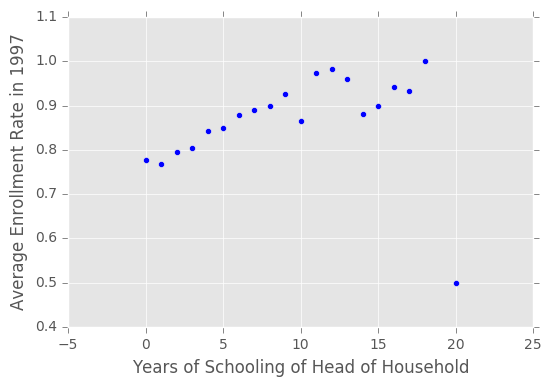

In [14]:

# Grouping data and finding average enrollment rates by level of household head education

avg_enroll = pd.DataFrame(progresa_df[progresa_df['year']==97].groupby('hohedu').mean()['sc'])
avg_enroll.reset_index(level = 0, inplace = True)
print(avg_enroll)

# Plotting the data

matplotlib.style.use('ggplot')
plt.scatter(list(avg_enroll['hohedu']),list(avg_enroll['sc']))
plt.xlabel("Years of Schooling of Head of Household")
plt.ylabel("Average Enrollment Rate in 1997")
plt.show()

The relationship between average school enrollment rates and the level of household head education is an interesting one. The avg enrollment rates increase steadily from around 0.75 to 0.92 for household head education years between 1 and 9. At the 10 year mark we observe a slight drop in average enrollment rates to 0.86 and the from year 11 onwards its back on track to around 0.97. There are many such drops and increases in the average enrollment rates as the years of household head education increases further. It finally drops to 0.5 as we hit the 20 year mark.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

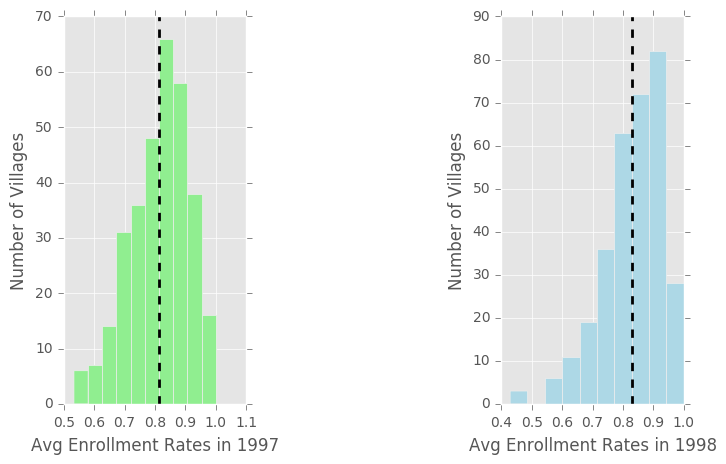


Mean of Avg Enrollment rates in 1997: 0.8138394110596501

Mean of Avg Enrollment rates in 1998: 0.8295362042630732

 Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.04424870036572115)


In [15]:
# Treatment villages in 1997
vill_enroll_97 = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 97) & (progresa_df['progresa'] == 1)].groupby('village').mean()
vill_enroll_97.reset_index(level=0, inplace = True)


# Treatment villages in 1998
vill_enroll_98 = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 98) & (progresa_df['progresa'] == 1)].groupby('village').mean()
vill_enroll_98.reset_index(level=0, inplace = True)

rcParams['figure.figsize'] = 8, 5

# Plotting histogram for avg enrollment rates by Village in 1997 and drawing a vertical line at teh mean
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.hist(vill_enroll_97['sc'], color = "lightgreen")
xlabel("Avg Enrollment Rates in 1997")
ylabel("Number of Villages")
plt.axvline(vill_enroll_97['sc'].mean(), color='black', linestyle='dashed', linewidth=2)

# Plotting histogram for avg enrollment rates by Village in 1998 and drawing a vertical line at teh mean
ax2 = fig.add_subplot(133)
ax2.hist(vill_enroll_98['sc'], color = 'lightblue')
xlabel("Avg Enrollment Rates in 1998")
ylabel("Number of Villages")
plt.axvline(vill_enroll_98['sc'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.show()

# Printing out mean of Average enrollments for the two years and running a quick T test

print("\nMean of Avg Enrollment rates in 1997:",vill_enroll_97['sc'].mean())
print("\nMean of Avg Enrollment rates in 1998:", vill_enroll_98['sc'].mean())
t = stats.ttest_ind(vill_enroll_97['sc'][~np.isnan(vill_enroll_97['sc'])], vill_enroll_98['sc'][~np.isnan(vill_enroll_98['sc'])])
print("\n",t)


From the above histograms we see that the overall mean of the average enrollment rates across villages in 1997 and 1998 has more or less remained the same at around 0.813 and 0.829. From just observing the histogram one might not be able to make a best judgement of the differences and the statistical significance. From the histogram, it looks like there is a shift in more villages moving higher to the 0.8 and 0.9 range in 1998 as compared to the treatment villages in 1997. However, to validate the statistical significance, I ran a T test and found the Pvalue to be 0.044 (so the differences may be statistically significant just by a small margin).

The approach corresponds to Difference Estimator DD1.

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [16]:
# Isolating the treatment and control villages for the year 1998
treatment_98 = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 98) & (progresa_df['progresa'] == 1)]
control_98 = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 98) & (progresa_df['progresa'] == 0)]

# Finding and printing out mean values for the enrollment rates in 1998 across treated and control groups
treatment_98_avg = treatment_98['sc'].mean()
control_98_avg = control_98['sc'].mean()
print("\nAvg Enrollment in Treated Villages in 98 is: ", treatment_98_avg)
print("Avg Enrollment in Control Villages in 98 is: ", control_98_avg)

# T test for determining differences in the two groups and their statistical significance
t = stats.ttest_ind(control_98['sc'][~np.isnan(control_98['sc'])], treatment_98['sc'][~np.isnan(treatment_98['sc'])])
print("\nThe Differences in Averages for Control and treatment villages (T Statistic): ",t.statistic)
print("The P value for Statistical Significance: ", t.pvalue)


Avg Enrollment in Treated Villages in 98 is:  0.8464791213954308
Avg Enrollment in Control Villages in 98 is:  0.807636956730308

The Differences in Averages for Control and treatment villages (T Statistic):  -8.35872056742
The P value for Statistical Significance:  6.63634444752e-17


The approach corresponds to DD2 estimator.

The average enrollment rates are 0.84 and 0.80 in the treated and control villages respectively. From the above impact analysis of the single differences in the enrollment rates in treated and control villages we observe statistically significant differences. It would be fair to conclude just from the data from 1998 for these treatment and control villages that the progresa program had a sizable impact on the enrollment rates of children in the treated villages.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [17]:
# Data for 1998 if the poor households
data_98 = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 98)]
data_98.loc[data_98.progresa == 'basal', 'progresa'] = 1
data_98.loc[data_98.progresa == '0', 'progresa'] = 0

# Running a regression model of enrollment rates on treatment assignment
lm = smf.ols(formula='sc ~ progresa', data=data_98).fit()
print(lm.params)
print(lm.summary())

C:\Users\Safelifenetwork6\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Intercept        0.807637
progresa[T.1]    0.038842
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           6.64e-17
Time:                        10:21:52   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

1. From the regression model, we are able to find the impact in terms of single difference of the enrollment rates in 1998 when subjected to the treatment. Progresa increases the likelihood of a child enrolling by 0.038. Further interpretting the parameters of the regression model:
    * In absence of treatment, the average enrollment rates would have been 0.807.
    * When the family is subject to treatment, there is an expected increase of 0.038 in the average enrollment rates.

2. The regression model is in sync with the T test we performed in the above question 2.1. The average values of enrollment in Control Village was 0.8076 (Absence of treatment), and the avg enrollment in treatment villages was 0.8464 (treatment == 1). This can be validated from our regression equation as: 0.8076 + 1 x 0.3884 = 0.8464.

3. From the regression model, we can reject the null hypothesis that the treatment effects are zero since the differences are statistically significant (p value < 0.05)

4. The counterfactual assumption underlying this regression is that in the absence of treatment, the results in the avg enrollment rates in the treated villages would be equal to the avg enrollment rates in the control villages.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [18]:

# Multiple linear regression with additional set of control variables
multiple_lm = smf.ols(formula='sc ~ progresa + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohwag + welfare_index + age + hohage', data=data_98).fit()
multiple_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        10:21:52   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4431      0.018     80.855      0.000         1.408     1.478
progresa[T.1]     0.0337      0.004      8.418      0.000         0.026     0.042
sex               0.0304      0.004      7.847      0.000         0.023     0.038
indig             0.0188      0.005      3.961      0.000         0.009     0.028
dist_sec         -0.0106      0.001    -12.012      0.000        -0.012    -0.009
fam_n             0.0006      0.001      0.727      0.467        -0.001     0.002
min_dist          0.0004   6.34e-05      6.326      0.000         0.000     0.001
dist_cap          0.0002    3.7e-05      5.512      0.000         0.000     0.000
hohedu            0.0079      0.001      9.224      0.000         0.006     0.010
hohwag         -7.23e-07   2.81e-06     -0.257      0.797     -6.24e-06  4.79e-06
welfare_index  2.283e-05   1.82e-05      1.253      0.210     -1.29e-05  5.85e-05
age              -0.0657      0.001    -94.750      0.000        -0.067    -0.064
hohage        -2.299e-05      0.000     -0.118      0.906        -0.000     0.000
==============================================================================
Omnibus:                     2940.375   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.254
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


This is an interesting model, introducing other control variables has improved the regression model in many ways. Firstly, the R sqaured value of this model is much better at 0.272 as compared to the previous single regression model whose R squared value is 0.003. Let's take a quick look into the specifics of the multivariate regression model below:
* Introducing the control factors has changed the point estimate for the treatment effect progress and it has decreased from 0.0388 in the single linear model to 0.0337 in the multiple regression model. This is not a huge drop but there are some notable changes in the intercept value of this model. There are other parameters in this multiple regression model which are also considerably statistically significant but not large in terms of their magnitude values.

* The introduction of the control variables has improved the standard error on the treatment effect from 0.005 to 0.004. Since the standard error of the estimate is a measurement of accuracy of a prediction, this introduction of other variables has solidified the prediction of our treatment effect and giving us a better representation of the bigger picture.

* The interpretation of our estimates in the multiple regression is interesting, mainly because the estimate of the intercept value is 1.4431 which is greater than 1 as compared to 0.8076 from the model in 2.2. Now, taking a deeper look at the other estimates we notice that the estimate of age and nearest distance to a secondary school are negative at -0.0657 and -0.0106 respectively. This means that for increase in age of a child by 1 year, there would be a decrease in the avg enrollment rates by 0.0657 units assuming other factors are not changed. And for every one mile farther the school is located, even this decreases the avg enrollment rate by 0.0106 holding other factors constant. Older students are less likely to enroll into school and families staying far are also less likely to send their kids to school. (Since this is a randomized trial it is fair to build foundations of a causal relationship). In addition to these factors, the most prominent promoter of the school enrollment is still the treatment effect of the progresa fund given to families which has an estimate of 0.0337.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [19]:
# Subsetting data for two years differently
data_97 = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 97)]
data_98 = progresa_df[(progresa_df['poor'] == 1) & (progresa_df['year'] == 98)]

# Creating a new dataframe for showing results in a tabular format
index = ['Avg Enrollment Before Treatment', 'Avg Enrollment After Treatment']
cols = ['Control Group', 'Treatment Group']
double_diff = pd.DataFrame(index = index, columns = cols)

# Calculating mean values
treatment_avg_98 = data_98['sc'][data_98.progresa == 1].mean() 
treatment_avg_97 = data_97['sc'][data_97.progresa == 1].mean()
control_avg_98 =  data_98['sc'][data_98.progresa == 0].mean()
control_avg_97 =  data_97['sc'][data_97.progresa == 0].mean()

# Finding the difference in difference value for impact evaluation of our treatment effect
diff_in_diff = (treatment_avg_98 - treatment_avg_97) - (control_avg_98 - control_avg_97)
print("The result of Difference-in-Difference gives us the estimate of the treatment effect on enrollment rates! ")
print("The value is: ", diff_in_diff)
print("\nSee table below for individual average values for treatment and control groups before and after treatment:")
double_diff.loc["Avg Enrollment Before Treatment","Control Group"] = control_avg_97
double_diff.loc["Avg Enrollment After Treatment","Control Group"] = control_avg_98
double_diff.loc["Avg Enrollment Before Treatment","Treatment Group"] = treatment_avg_97
double_diff.loc["Avg Enrollment After Treatment","Treatment Group"] = treatment_avg_98
double_diff

The result of Difference-in-Difference gives us the estimate of the treatment effect on enrollment rates! 
The value is:  0.031331280319323085

See table below for individual average values for treatment and control groups before and after treatment:


,Control Group,Treatment Group
Avg Enrollment Before Treatment,0.815186,0.822697
Avg Enrollment After Treatment,0.807637,0.846479


* The estimate of our impact using the Difference-in-Difference method gives us a value of 0.0313 which is lower when compared to the estimate derived from the earlier simple difference methods which produced an estimate of 0.0388. The estimate produced in the Difference-in-Difference method is more accurate.

* The counterfactual assumption here in this case is that the trends in treatment group and control group would have been the same in the absence of treatment.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [20]:
progresa_df.loc[progresa_df['poor'] == 'pobre', 'poor'] = 1
progresa_df.loc[progresa_df['poor'] ==  'no pobre', 'poor'] = 0
progresa_df.loc[progresa_df.year == 97, 'post'] = 0
progresa_df.loc[progresa_df.year == 98, 'post'] = 1
pd.to_numeric(progresa_df['progresa'])
pd.to_numeric(progresa_df['poor'])
progresa_poor = progresa_df[progresa_df['poor'] == 1]
dd_lm = smf.ols(formula = 'sc ~ progresa + post + progresa:post + sex + dist_sec  + min_dist + dist_cap + hohedu + age + hohage', data=progresa_poor).fit()
dd_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     2296.
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        10:21:52   Log-Likelihood:                -16585.
No. Observations:               58344   AIC:                         3.319e+04
Df Residuals:                   58333   BIC:                         3.329e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              1.4215      0.009    158.822      0.000         1.404     1.439
progresa[T.1]          0.0031      0.004      0.817      0.414        -0.004     0.010
post                   0.0274      0.004      6.321      0.000         0.019     0.036
progresa[T.1]:post     0.0313      0.005      5.690      0.000         0.020     0.042
sex                    0.0331      0.003     12.429      0.000         0.028     0.038
dist_sec              -0.0093      0.001    -15.020      0.000        -0.010    -0.008
min_dist               0.0004   4.37e-05      8.550      0.000         0.000     0.000
dist_cap               0.0003   2.36e-05     10.821      0.000         0.000     0.000
hohedu                 0.0072      0.001     12.322      0.000         0.006     0.008
age                   -0.0657      0.000   -143.888      0.000        -0.067    -0.065
hohage                 0.0002      0.000      1.838      0.066     -1.58e-05     0.000
==============================================================================
Omnibus:                     5488.522   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7205.368
Skew:                          -0.859   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We take into consideration the interaction between the treatment term and the year to quantify the causal impact. Interpretting the coefficients below:
    * Interpretting "progresa:post" interaction coefficient: For families in year 1998 being subjected to the progresa subsidy program, the average enrollment rates would be 0.0313 higher.
    * Interpretting "post" term: For the year 1998, the average enrollment rate is higher by 0.0274.
    * The progresa coefficient has the value 0.0031 but it is no longer statistically significant.
* The impact estimation of the difference in difference model is lower than that of simple difference. The possible explanation could be the lack of thoroughness in considering the different players in the simple difference model hence giving us estimates higher than the true impact of the treatment.Also, with an assumption that it is a randomized trial, the covariance between any control variables and the treatment should be 0.
* The overall impact is more or similar to that of 2.4 except that we have introduced terms of the time consideration and its interaction with the progresa treatment. The impact in the year 1998 for the treatment group would be measured as a sum of these 3 terms while the double difference in tabular format would just consider the differences in the means of the treatment and control group before and after treatment. Additionally, there can be some differences by introduction of control variables (in the case of randomization failure allowing systematic differences even before the groups are subject to any treatment).
* The counterfactual assumption is that the trends in treatment group and control group would have been the same in the absence of treatment.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [21]:
progresa_df_98 = progresa_df[progresa_df['year'] == 98]
dd_lm = smf.ols(formula = 'sc ~ progresa + poor + progresa:poor + sex + dist_sec  + min_dist + dist_cap + hohedu + age', data=progresa_df_98).fit()
dd_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1344.
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        10:21:53   Log-Likelihood:                -9237.3
No. Observations:               32097   AIC:                         1.849e+04
Df Residuals:                   32087   BIC:                         1.858e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.4816      0.012    122.903      0.000         1.458     1.505
progresa[T.1]               0.0250      0.010      2.583      0.010         0.006     0.044
poor[T.1]                  -0.0211      0.008     -2.558      0.011        -0.037    -0.005
progresa[T.1]:poor[T.1]     0.0094      0.010      0.894      0.371        -0.011     0.030
sex                         0.0306      0.004      8.493      0.000         0.024     0.038
dist_sec                   -0.0105      0.001    -12.741      0.000        -0.012    -0.009
min_dist                    0.0003   5.92e-05      5.736      0.000         0.000     0.000
dist_cap                    0.0003   3.28e-05      9.368      0.000         0.000     0.000
hohedu                      0.0085      0.001     12.210      0.000         0.007     0.010
age                        -0.0661      0.001   -103.966      0.000        -0.067    -0.065
==============================================================================
Omnibus:                     3179.660   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4231.906
Skew:                          -0.888   Prob(JB):                         0.00
Kurtosis:                       3.111   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The above alternative approach compares enrollment rates in 1998 between poor and non-poor across treatment and control villages. The interpretation for some of our estimates:
    * 'Progresa' coefficient is 0.0250 which signifies the causal impact of households recieving the progresa program benefits (treatment group) would result in the average enrollment rates increasing by 0.0250.
    * 'Poor' coefficient value is -0.0211 which implies that for the poor households would have lower average enrollment rates by 0.0211. This is somewhat strange since only the poor households are supposed to receive the progresa subsidy and the expected behavior is that the avg enrollment rates for poor households is supposed to be higher.
    * The interaction between progresa:poor[T.1] has an estimate of 0.0094 but this value is not statistically significant (p value > 0.05).
* The counterfactual assumption underlying this regression model is that in the absence of treatment effect, the average enrollment rates across poor and non-poor households remains the same.
* These treatment effects are slightly different from our calculations above: when we add the coefficient values to find the total causal impact of progresa on poor households in 1998 we get the value of 0.0250+0.0211-0.0094 gives us the impact of 0.0367. However, the term 0.0094 for the interaction between poor and progresa is not significant (one possible reason why it may not be significant is that only poor households are anyways expected to be a part of the progresa program and not the non-poor households).
* Some starking differnces are in terms of the sign of the impact terms -- poor coefficient is negative, this is against the run of expected behavior of the poor households would get the benefit from progresa allowing the avg enrollments to be higher. Additionally, the progresa:poor interaction term is not statistically significant possibly because only poor households are expected to be a part of the progresa program and not the non-poor households.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

This was an interesting study, and yes, the progresa program did have causal impact on the enrollment rates of the poor households in Mexico in 1998. In addition to that it may have also boosted the overall enrollment across the villages in both treatment and control groups.

However, the magnitude of the impact is not drastically high as growth in enrollment rates occurs over a period of time as the scale of the program grows and more households are treated with the subsidy.
There are multiple things to consider to ensure results of the study (causal impact of treatment) being accurately quantified and also the process is implemented without intended flaw. Assuming that the study was conducted with good randomization and the treatment and control groups do not differ significantly allows us to measure the causal impact accurately.

In the end, the return on investment for the stakeholders (in this case the government pumping money) calculation matters. If the government is paying more than what the enrollment costs then the amount may be used for other purposes. Also, there is no way to validate if the money is actually used for enrollment purposes (for instance, the government subsidizes 100 households, but only few tens actually get their children enrolled -- the progresa program still has an impact but the magnitude is not as high as it is supposed to be).